### Spectral Relaxation for K-means Clustering

First version

In [87]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [111]:
A = np.array([[1,1,4,5,5], [1, 2,1,1,2]]) #jednostavna matrica 
print(A)
print(pd.DataFrame(A))

[[1 1 4 5 5]
 [1 2 1 1 2]]
   0  1  2  3  4
0  1  1  4  5  5
1  1  2  1  1  2


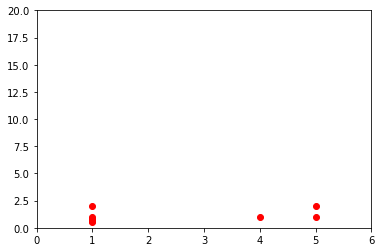

In [88]:
A = np.array([[1,1,4,5,5,1,1,1,1], [1, 2,1,1,2,0.5,0.8,0.6,0.7]]) #jednostavan primjer
plt.plot(A[0,:],A[1,:], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [35]:
#""""
centri = np.array([[10, 2], [-4, 3]], dtype=float)
A = [np.random.randn(2, 50) + np.expand_dims(centar, axis=1) 
    for centar in centri]
A = np.concatenate(A, axis=1)
#"""

A = pd.DataFrame(A)
print(A)
nmax = 5
k = 3

while True:
    starting_partition = np.random.randint(0, k, A.shape[1])
    s_i = np.unique(starting_partition, axis=0, return_counts=True)[1]
    if len(s_i) == k:
        break

A.columns = starting_partition 

for n in tqdm(range(nmax)):
    s_i = np.unique(starting_partition, axis=0, return_counts=True)[1]
    a_i = A.groupby(level=0,axis=1).sum().add_suffix('_centroid_klastera')
    m_i = a_i / s_i 
    for i in range(A.shape[1]): 
        distance_final = np.inf
        for j in range(0, m_i.shape[1]):
            distance = np.linalg.norm((A.iloc[:,i] - m_i.iloc[:,j]))
            if(distance < distance_final):
                distance_final = distance
                tmp = list(A.columns)
                tmp[i] = j
                A.columns = tmp  
    starting_partition = A.columns.values 

print(A)   
print(m_i)

         0         1          2         3          4         5          6   \
0  8.044549  9.883210  10.303079  9.495095  10.040599  8.177206  10.832563   
1  2.225365  3.152283   2.190810  2.518609  -0.086184  1.331959   2.344524   

         7         8         9   ...        90        91        92        93  \
0  9.566723  9.501055  9.701080  ... -3.458766 -4.212722 -3.342893 -4.639311   
1  1.562739  3.378033  1.761686  ...  1.922130  3.430442  1.554050  4.502817   

         94        95        96        97        98        99  
0 -4.363386 -3.737367 -4.194781 -4.876594 -5.025584 -5.427860  
1  4.640729  1.473368  1.927335  4.679656  3.354687  3.828168  

[2 rows x 100 columns]


100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

          0         0          0         0          0         0          0  \
0  8.044549  9.883210  10.303079  9.495095  10.040599  8.177206  10.832563   
1  2.225365  3.152283   2.190810  2.518609  -0.086184  1.331959   2.344524   

          0         0         0  ...         1         1         1         1  \
0  9.566723  9.501055  9.701080  ... -3.458766 -4.212722 -3.342893 -4.639311   
1  1.562739  3.378033  1.761686  ...  1.922130  3.430442  1.554050  4.502817   

          1         1         1         1         1         1  
0 -4.363386 -3.737367 -4.194781 -4.876594 -5.025584 -5.427860  
1  4.640729  1.473368  1.927335  4.679656  3.354687  3.828168  

[2 rows x 100 columns]
   0_centroid_klastera  1_centroid_klastera
0             9.941625            -3.861249
1             1.854261             2.786620


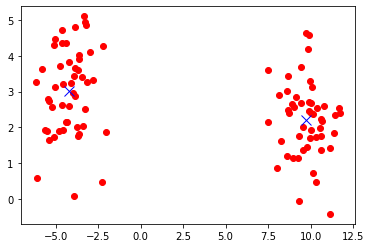

In [34]:
plt.plot(A.iloc[0,:],A.iloc[1,:], 'ro')
plt.plot(m_i.iloc[0,:],m_i.iloc[1,:], 'bx', ms=10)
plt.show()
#plavi centroidi

## 9. prosinac 2021.

In [7]:
import scipy.io
import numpy as np
from scipy.sparse.linalg import eigs

mat_1 = scipy.io.loadmat('azip.mat')
A = mat_1['azip']
mat_2 = scipy.io.loadmat('dzip.mat')
D = mat_2['dzip']

k = 10

In [10]:
Q, R = np.linalg.qr(A)
R_1 = R[0:k, 0:k]
R_2 = R[0:k, (k+1): R.shape[1]]

R = np.matmul( np.linalg.inv(R_1), R_2)

In [64]:
U, S, V = np.linalg.svd(np.matmul(np.transpose(A),A))
V = V[:, 0:k]
Q, R_t = np.linalg.qr(np.transpose(V))
print(R_t.shape)
R_1 = R_t[0:k, 0:k]
R_2 = R_t[0:k, (k+1): R_t.shape[1]]

(10, 1707)


In [63]:
R = np.matmul( np.linalg.inv(R_1), R_2)

In [11]:
##Josipa
part=np.zeros(R.shape[1])
for i in range(R.shape[1]):
    argvalue = np.abs(max(R[i,10:R.shape[1]]))
    for j in range(10,R.shape[1]):
        if abs(R[i][j])==argvalue:
            argmax=j
    part[i] = argmax
    #R[0:k, i] = np.zeros(k);
    #R[i,argmax ] = 1;
    break;

## 14.12.2021.

In [3]:
import scipy.io

import numpy as np
from scipy.sparse.linalg import eigs

Učitavanje podataka

In [2]:
mat_1 = scipy.io.loadmat('azip.mat')
A = mat_1['azip'] #data

mat_2 = scipy.io.loadmat('dzip.mat')
D = mat_2['dzip'] #data

k = 10 

Prvo ćemo presložiti matricu podataka(**A**) na način da združimo one elemente koji pripadaju istom klasteru i napravimo od njih blokove. Nakon toga, pomoću kreiranih blokova, računamo broj elementa klastera(**$s_i$**) i nove centroide (**$m_i$**) pomoću formula s prezentacije(*prva prezentacija - slajd 35*).

In [4]:
new_A = np.empty([A.shape[0],0])
s_i = np.empty(k, dtype=int) 
m_i = np.empty([A.shape[0],k])
permutation = np.empty(0,) 

for i in range(k):
    A_i = A[:, np.where(D == i)[1]] 
    permutation = np.append(permutation, np.where(D == i)[1], axis=0) 
    new_A = np.append(new_A, A_i, axis=1)
    s_i[i] = np.where(D == i)[1].shape[0]
    e = np.ones(s_i[i])
    m_i[:,i] = (1/s_i[i]) * np.matmul(A_i, e) 


Konačno, formuliramo matricu X koja će sadržavati informacije o pripadnosti elementa početnoj particiji.

In [7]:
X = np.zeros([A.shape[1],k])

for i in range(k):
    if( i == 0):
        X[i:s_i[i], 0] = 1/s_i[1]
    else:
        X[ s_i[0:i].sum() : s_i[0:i].sum() + s_i[i], i] = 1/s_i[i-1]

Na kraju, preostaje ponovo inverzno djelovati istom permutacijom na matricu $X$ kako bismo dobili $\tilde{X}$.

In [8]:
X_tilde = np.zeros([A.shape[1],k])

for i in range(X.shape[0]):
    index = list(permutation).index(i)  
    X_tilde[int(permutation[i]), :] = X[i, :] 

Preostaje zapisati početnu particiju.

In [6]:
start_partition = np.empty(D.shape[1], dtype=int)

for i in range(X.shape[0]):
    start_partition[i] = int(np.where(X_tilde[i, :] != 0)[0])

In [7]:
from sklearn.metrics import accuracy_score

start_partition = np.reshape(start_partition, (D.shape[1],1))
accuracy_score(start_partition, np.transpose(D))

1.0

Vidimo da se ova početna particija 100% podudara s točnim rješenjima, pa možemo reći da je idealna, odnosno da je naš algoritam jako dobar.

In [9]:
M = start_partition == np.transpose(D)

## 15. prosinac 2021.

In [18]:
testzip = scipy.io.loadmat('testzip.mat')
At = testzip ['testzip']
dtest = scipy.io.loadmat('dtest.mat')
Dt = dtest['dtest']
niz_test = Dt[0]
niz = D[0]

k = 10

In [19]:
baze_prostora_znamenki = dict()

for i in range (k):
    J = [j for j, x in enumerate(niz) if x == i] 
    B = A[:,J]
    U, S, V = np.linalg.svd(B)
    baze_prostora_znamenki[i] = U[:,0:k]
    
n = len(niz_test)
rez = np.zeros(n)


brojac = 0
br = 0
for i in range (n):
    z = At[:,i]
    y = np.dot(baze_prostora_znamenki[0],baze_prostora_znamenki[0].T)
    x = np.dot(y,z)
    min_udaljenost = np.linalg.norm(z - x)
    klaster = 0
    for j in range (1,10):
        y = np.dot(baze_prostora_znamenki[j],baze_prostora_znamenki[j].T)
        x = np.dot(y,z)
        udaljenost = np.linalg.norm(z - x)
        if (udaljenost < min_udaljenost):
            #print(j)
            min_udaljenost = udaljenost
            klaster = j 
    rez[i] = klaster
  

from sklearn.metrics import accuracy_score
accuracy_score(rez,niz_test)


0.931738913801694
[9. 6. 3. ... 4. 0. 1.]


### 15.12.2021. - part II.

In [13]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn.metrics import accuracy_score

In [3]:
mat_1 = scipy.io.loadmat('azip.mat')
A = mat_1['azip'] #data

mat_2 = scipy.io.loadmat('dzip.mat')
D = mat_2['dzip'] #data

k = 10 

In [85]:
U, S, V = np.linalg.svd(A)

U = U[:,0:k]
V = V[0:k, :]
S_ = np.zeros((1707, 1707), int)
np.fill_diagonal(S_, S)
S_.shape
S = S_[0:k,0:k]


In [86]:
X = U @ S @ V

In [88]:
Q, R = np.linalg.qr(X) #?
R_1 = R[0:k, 0:k]
R_2 = R[0:k, k: R.shape[1]]

R = np.matmul(np.linalg.inv(R_1), R_2)

In [89]:
Q, R, P = np.linalg.qr(np.transpose(X)) #?
R_1 = R[0:k, 0:k]
R_2 = R[0:k, k: R.shape[1]]

R = np.matmul(np.linalg.inv(R_1), R_2)
I = np.eye(10, dtype=int)
Final = np.transpose(np.append(I,R,axis=1))

In [73]:
particija = np.argmax(Final, axis=1)
particija.shape

(1707,)

In [74]:
D_ = np.array(D, dtype='int')
D_[0].shape

(1707,)

In [75]:
accuracy_score(D_[0], particija)

0.042765084944346804

## 16. 12. 2021. 

Prema uputama u članku:

In [5]:
U, S, V = np.linalg.svd(np.transpose(A) @ A)
X_k = V[:, 0:k] #primjeni k-means na retke -> poglavlje 2

(1707, 10)

In [110]:
X_final = np.transpose(X_k) @ P

In [106]:
Q, R, P = scipy.linalg.qr(A, pivoting = True)

In [124]:
P_ = np.zeros([1707,1707])

In [125]:
for i in range(1707):
    P_[i,P[i]] = 1

In [145]:
U, S, V = np.linalg.svd(np.transpose(A) @ A)

U = U[:,0:k]
V = V[0:k, :]
S_ = np.zeros((1707, 1707), int)
np.fill_diagonal(S_, S)
S_.shape
S = S_[0:k,0:k]

X = U @ S @ V

In [167]:
X__ = np.transpose(X) @ P_

In [168]:
Q, R = np.linalg.qr(np.transpose(X__)) 
R_1 = R[0:k, 0:k]
R_2 = R[0:k, k: R.shape[1]]

R = np.matmul(np.linalg.inv(R_1), R_2)
I = np.eye(10, dtype=int)
Final = np.transpose(np.append(I,R,axis=1))

In [169]:
particija = np.argmax(Final, axis=1)

In [170]:
particija

array([0, 1, 2, ..., 4, 0, 9])

In [171]:
accuracy_score(D_[0], particija)

0.042765084944346804

## 17.12.2021.

Učitavanje podataka:


In [94]:
mat_1 = scipy.io.loadmat('azip.mat')
A = mat_1['azip'] #data

mat_2 = scipy.io.loadmat('dzip.mat')
D = mat_2['dzip'] #data

k = 10 

In [96]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,6,5,4,7,3,6,3,1,0,1,...,8,0,5,1,9,8,9,7,9,8


Prvi način relaksije:

In [173]:
from scipy.linalg import eigh

eigenvalues, eigenvectors = eigh(np.transpose(A) @ A) 

eigenvalues = eigenvalues[A.shape[1]-k:A.shape[1]][::-1] 
X_k = np.flip(eigenvectors[:, (A.shape[1]-k):A.shape[1]] ,axis=1)


Drugi način relaksije:

In [174]:
Q, R, P = scipy.linalg.qr(np.transpose(X_k), pivoting = True)


P_ = np.zeros([A.shape[1],A.shape[1]])
for i in range(A.shape[1]):
    P_[P[i],i] = 1


R_11 = R[0:k, 0:k]
R_12 = R[0:k, k:R.shape[1]]

I = np.eye(k, dtype=int)
R = np.matmul(np.linalg.inv(R_11), R_12)

R_kapa = np.append(I,R,axis=1)  @  np.transpose(P_)
R_kapa = np.absolute(R_kapa)
particija = np.argmax(R_kapa, axis=0)

K-means:

In [199]:
A = pd.DataFrame(A)
k = 3
partition = particija
A.columns = partition 

number_of_iteration = 0
epsilon = 0.001

Q_of_partition = np.inf

while(Q_of_partition > epsilon):
    
    number_of_iteration += 1
    
    Q_of_partition_before = 0
    for i in range(A.shape[1]):
        Q_of_partition_before  += np.linalg.norm((A.iloc[:,i] - m_i.iloc[:,A.columns[i]]))
    
    s_i = np.unique(partition, axis=0, return_counts=True)[1]
    a_i = A.groupby(level=0,axis=1).sum().add_suffix('. centroid')
    m_i = a_i / s_i 
    for i in range(A.shape[1]): 
        distance_final = np.inf
        for j in range(0, m_i.shape[1]):
            distance = np.linalg.norm((A.iloc[:,i] - m_i.iloc[:,j]))
            if(distance < distance_final):
                distance_final = distance
                tmp = list(A.columns)
                tmp[i] = j
                A.columns = tmp  
    partition = A.columns.values
    
    Q_of_partition_after = 0
    for i in range(A.shape[1]):
        Q_of_partition_after  += np.linalg.norm((A.iloc[:,i] - m_i.iloc[:,A.columns[i]]))
    
    Q_of_partition = Q_of_partition_before - Q_of_partition_after

print(number_of_iteration)

1
